In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_finance as mpf
import warnings
import talib
warnings.filterwarnings("ignore")
%matplotlib inline

c:\users\eggs\appdata\local\programs\python\python38\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
uni_President=pd.read_csv('1216.csv')
uni_President.index=pd.to_datetime(uni_President.Date)
uni_President.head()

,Date,Date.1,Close,Open,High,Low,Volume,ROI
Date,,,,,,,,
2013-01-02,2013/1/2,2013/1/2,41.45,41.38,41.84,41.15,9438,1.1257
2013-01-03,2013/1/3,2013/1/3,41.45,41.53,41.68,41.22,9275,0.0000
2013-01-04,2013/1/4,2013/1/4,41.84,41.68,41.91,41.45,10912,0.9276
2013-01-07,2013/1/7,2013/1/7,41.38,41.45,41.68,41.22,7535,-1.1029
2013-01-08,2013/1/8,2013/1/8,41.30,41.22,41.68,41.15,4368,-0.1859


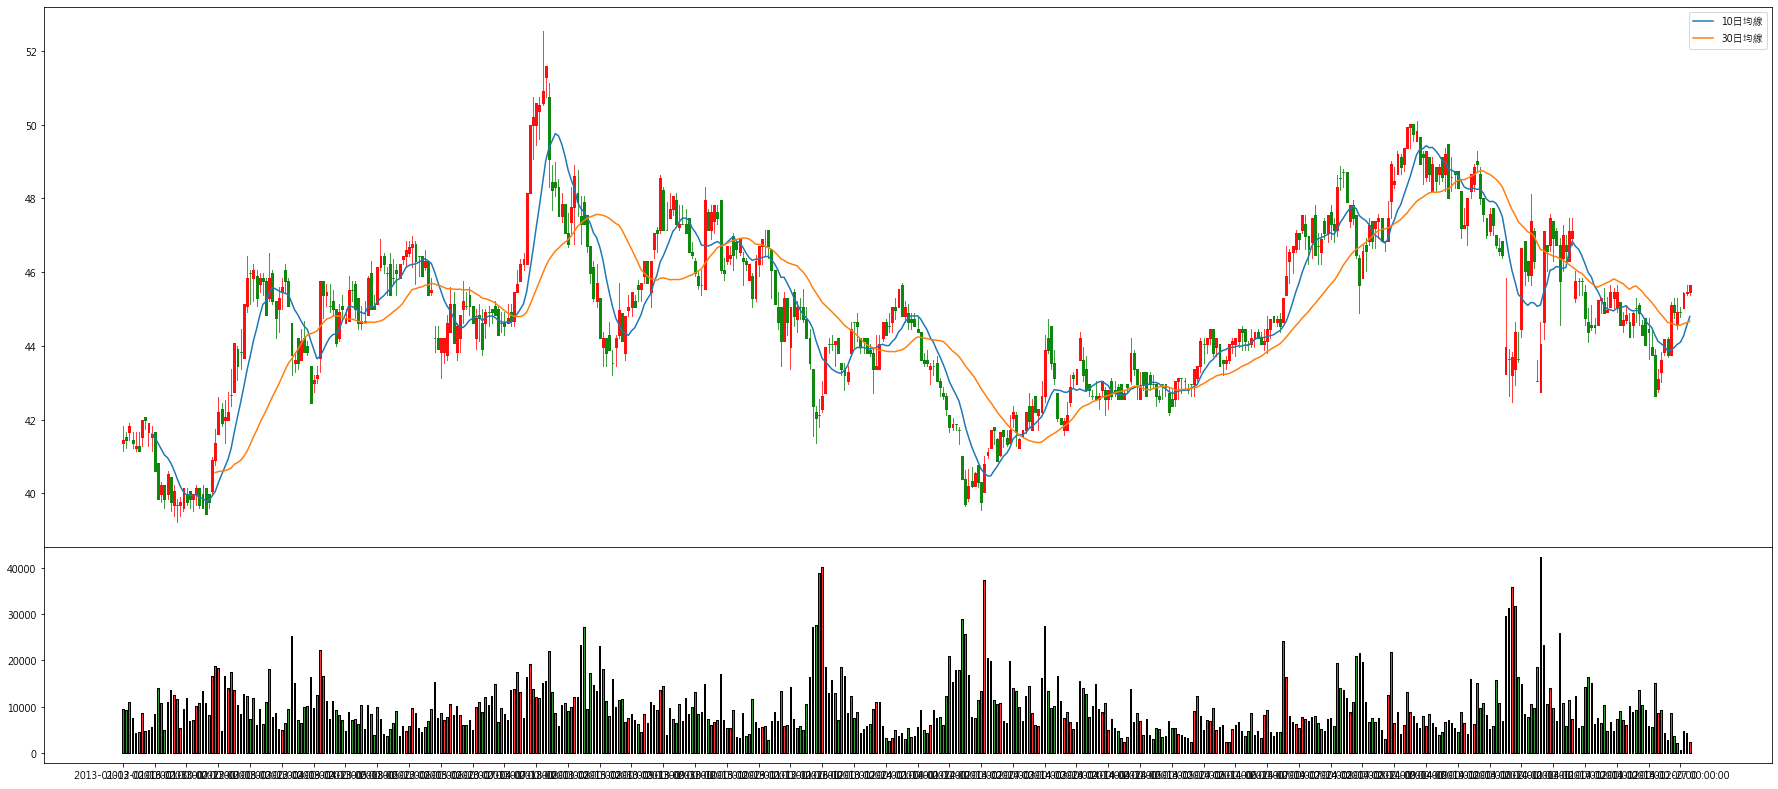

In [3]:
sma_10 = talib.SMA(np.array(uni_President['Close']), 10)
sma_30 = talib.SMA(np.array(uni_President['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(uni_President.index), 10))
ax.set_xticklabels(uni_President.index[::10])
mpf.candlestick2_ochl(ax, uni_President['Open'], uni_President['Close'], uni_President['High'],
                      uni_President['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, uni_President['Open'], uni_President['Close'], uni_President['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(uni_President.index), 10))
ax2.set_xticklabels(uni_President.index[::10])

ax.legend();

In [4]:
def rsi(price,period=6):
    import pandas as pd
    closeDif=(price-price.shift(1)).dropna()
    upPrc=pd.Series(0,index=closeDif.index)
    upPrc[closeDif>0]=closeDif[closeDif>0]
    downPrc=pd.Series(0,index=closeDif.index)
    downPrc[closeDif<0]=-closeDif[closeDif<0]
    rsi=[]
    for i in range(period,len(upPrc)+1):
        up_mean = np.mean(upPrc.values[(i-period):i],\
        dtype=np.float32)
        up_down = np.mean(downPrc.values[(i-period):i],\
        dtype=np.float32)
        rsi.append(100*up_mean/(up_mean+up_down))
    rsi=pd.Series(rsi,index=closeDif.index[(period-1):])
    return(rsi)

In [5]:
Close=uni_President.Close
closeDif=Close-Close.shift(1)
closeDif=closeDif.dropna()
indexprc=closeDif.index
upPrc=pd.Series(0,index=indexprc)
upPrc[closeDif>0]=closeDif[closeDif>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[closeDif<0]=-closeDif[closeDif<0]
rsidata=pd.concat([Close,closeDif,upPrc,downPrc],axis=1)
rsidata.columns=['Close','closeChange','upPrc','downPrc']
rsidata=rsidata.dropna()
rsidata.head()

,Close,closeChange,upPrc,downPrc
Date,,,,
2013-01-03,41.45,0.00,0.00,0.00
2013-01-04,41.84,0.39,0.39,0.00
2013-01-07,41.38,-0.46,0.00,0.46
2013-01-08,41.30,-0.08,0.00,0.08
2013-01-09,41.15,-0.15,0.00,0.15


<font size=6>**6日RSI**</font>

In [6]:
SMUP6=[]
SMDOWN6=[]
for i in range(6,len(upPrc)+1):
    SMUP6.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN6.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

In [7]:
rsi6=[100*SMUP6[i]/(SMUP6[i]+SMDOWN6[i]) for i in range(len(SMUP6))]

In [8]:
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()
Rsi6.describe()

count    488.000000
mean      50.059729
std       24.757504
min        0.000000
25%       32.656780
50%       51.803325
75%       66.666666
max      100.000000
dtype: float64

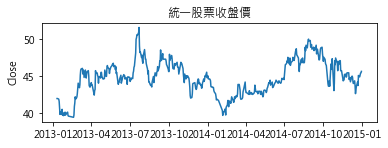

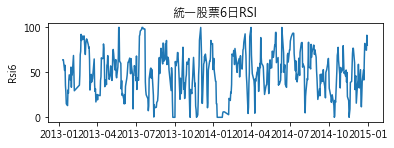

In [9]:
#收盤價和6日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi6.index])
plt.ylabel('Close')
plt.title('統一股票收盤價')
plt.show()

plt.subplot(212)
plt.plot(Rsi6)
plt.ylabel('Rsi6')
plt.title('統一股票6日RSI')
plt.show()

<font size=6>**30日RSI**</font>

In [10]:
SMUP30=[]
SMDOWN30=[]
for i in range(30,len(upPrc)+1):
    SMUP30.append(np.mean(upPrc.values[(i-30):i],dtype=np.float32))
    SMDOWN30.append(np.mean(downPrc.values[(i-30):i],dtype=np.float32))

In [11]:
rsi30=[100*SMUP30[i]/(SMUP30[i]+SMDOWN30[i]) for i in range(len(SMUP30))]

In [12]:
indexRsi=indexprc[29:]
Rsi30=pd.Series(rsi30,index=indexRsi)
Rsi30.head()
Rsi30.describe()

count    464.000000
mean      51.340446
std        9.660386
min       26.205450
25%       45.037635
50%       51.905693
75%       57.545446
max       74.576269
dtype: float64

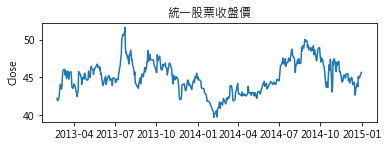

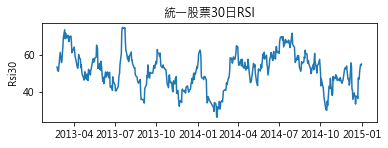

In [13]:
#收盤價和30日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi30.index])
plt.ylabel('Close')
plt.title('統一股票收盤價')
plt.show()

plt.subplot(212)
plt.plot(Rsi30)
plt.ylabel('Rsi30')
plt.title('統一股票30日RSI')
plt.show()

<font size=6>**6日>90 & 6日<10**</font>

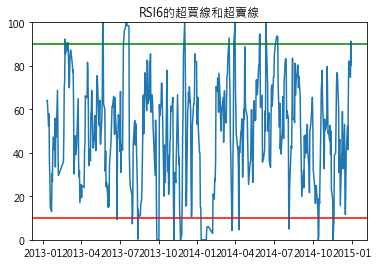

In [14]:
plt.plot(Rsi6)
plt.title('RSI6的超買線和超賣線')
plt.ylim(0,100)
plt.axhline(y=90,color='green')
plt.axhline(y=10,color='red')
plt.show()

In [15]:
rsi6=rsi(Close,6)

In [16]:
Sig1=[]
for i in rsi6:
    if i>90:
        Sig1.append(-1)
    elif i<10:
        Sig1.append(1)
    else:
        Sig1.append(0)

In [17]:
Signal1=pd.Series(Sig1,index=rsi6.index)
Signal1[Signal1==1].head(n=3)
Signal1[Signal1==-1].head(n=3)
signal=Signal1.dropna()
tradSig=signal.shift(1)

In [18]:
ret=Close/Close.shift(1)-1
ret.head()

Date
2013-01-02         NaN
2013-01-03    0.000000
2013-01-04    0.009409
2013-01-07   -0.010994
2013-01-08   -0.001933
Name: Close, dtype: float64

In [19]:
ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy

In [20]:
sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell

tradeRet=ret*tradSig

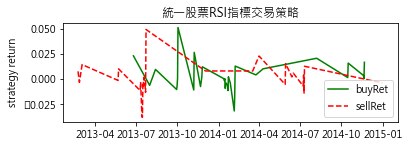

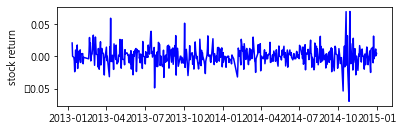

In [21]:
plt.subplot(211)
plt.plot(buyRet,label='buyRet',color='g')
plt.plot(sellRet,label='sellRet',
    color='r',linestyle='dashed')
plt.title('統一股票RSI指標交易策略')
plt.ylabel('strategy return')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')
plt.show()

In [22]:
def strat(tradeSignal,ret):
    ret=ret[tradeSignal.index]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
           tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
            tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
             tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss': meanLoss}
    return(perform)

BuyOnly=strat(buy,ret)
SellOnly=strat(sell,ret)
Trade=strat(tradSig,ret)
Test=pd.DataFrame({"BuyOnly":BuyOnly,\
        "SellOnly":SellOnly,"Trade":Trade})
Test

,BuyOnly,SellOnly,Trade
winRate,0.517241,0.481481,0.491228
meanWin,0.013863,0.012172,0.013078
meanLoss,-0.009777,-0.011542,-0.010660


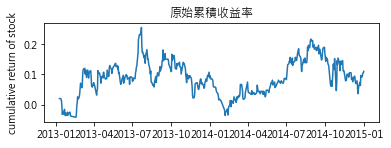

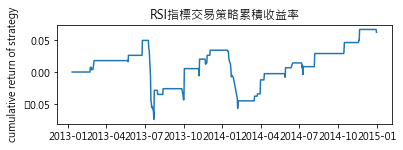

In [23]:
#累计收益率
cumStock=np.cumprod(1+ret)-1
cumTrade=np.cumprod(1+tradeRet)-1

plt.subplot(211)
plt.plot(cumStock)
plt.ylabel('cumulative return of stock')
plt.title('原始累積收益率')
plt.show()

plt.subplot(212)
plt.plot(cumTrade)
plt.ylabel('cumulative return of strategy')
plt.title('RSI指標交易策略累積收益率')
plt.show()

<font size=6>**Gold Cross**</font>

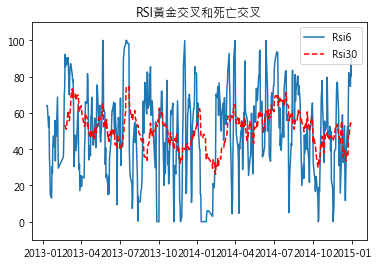

In [24]:
#黃金交叉和死亡交叉
plt.plot(Rsi6,label='Rsi6')
plt.plot(Rsi30,
         label='Rsi30',color='red',\
         linestyle='dashed')
plt.title('RSI黃金交叉和死亡交叉')
plt.ylim(-10,110)
plt.legend()
plt.show()

In [25]:
rsi30=rsi(Close,30)

In [26]:
Signal1=pd.Series(0,index=rsi30.index)
for i in rsi30.index:
    if (rsi6[i] > rsi30[i]):
        Signal1[i]=1
    elif (rsi6[i] < rsi30[i]):
        Signal1[i]=-1

In [27]:
Signal1[Signal1==1].head(n=10)
Signal1[Signal1==-1].head(n=10)
signal=Signal1.dropna()
tradSig=signal.shift(1)

In [28]:
ret=Close/Close.shift(1)-1
ret.head()

Date
2013-01-02         NaN
2013-01-03    0.000000
2013-01-04    0.009409
2013-01-07   -0.010994
2013-01-08   -0.001933
Name: Close, dtype: float64

In [29]:
ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy

In [30]:
sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell

tradeRet=ret*tradSig

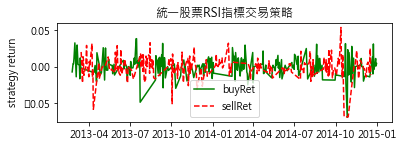

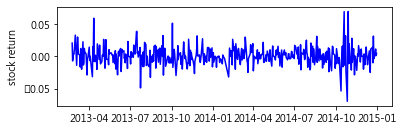

In [31]:
plt.subplot(211)
plt.plot(buyRet,label='buyRet',color='g')
plt.plot(sellRet,label='sellRet',
    color='r',linestyle='dashed')
plt.title('統一股票RSI指標交易策略')
plt.ylabel('strategy return')
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')
plt.show()

In [32]:
def strat(tradeSignal,ret):
    ret=ret[tradeSignal.index]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
           tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
            tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
             tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss': meanLoss}
    return(perform)

BuyOnly=strat(buy,ret)
SellOnly=strat(sell,ret)
Trade=strat(tradSig,ret)
Test=pd.DataFrame({"BuyOnly":BuyOnly,\
        "SellOnly":SellOnly,"Trade":Trade})
Test

,BuyOnly,SellOnly,Trade
winRate,0.516279,0.466019,0.490521
meanWin,0.011065,0.011510,0.011271
meanLoss,-0.011225,-0.010631,-0.010919


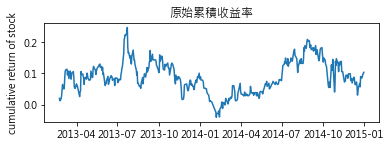

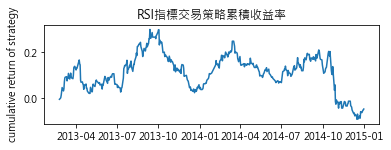

In [33]:
#累计收益率
cumStock=np.cumprod(1+ret)-1
cumTrade=np.cumprod(1+tradeRet)-1

plt.subplot(211)
plt.plot(cumStock)
plt.ylabel('cumulative return of stock')
plt.title('原始累積收益率')
plt.show()

plt.subplot(212)
plt.plot(cumTrade)
plt.ylabel('cumulative return of strategy')
plt.title('RSI指標交易策略累積收益率')
plt.show()